# # RAMI Benchmarking 
 The goal of the RAMI4PILPS experiment[^1] is to evaluate different approaches by which Land Surface Models in larger Earth System Models quantify the radiation transfer within vegetation canopies. The RAMI4PILPS can be interpreted as a quality control mechanism used to: 

1) quantify the errors in the radiative transfer scheme;

2) identify the impact that structural and spectral sub-grid variability may have on radiative transfer; and 

3) verify the conservation of energy at the level of the surface, as well as inconsistencies arising from different levels of assumptions/simplifications. 

This approach involves direct comparison with reference solutions obtained from highly accurate 3D models identified during the third phase of the RAMI benchmarking exercise[^2]. 

A set of 3D experiments compares the partitioning of incident solar energy into an absorbed (A) flux, a transmitted (T) flux component and the surface reflectance (R). The overall canopy structure for these test cases is reminiscent of open forest canopies with randomly oriented foliage, confined to spherical volumes located at varying heights above the ground.
In here, we use a total of 36 test cases including various canopy density, soil brightness, and illumination conditions for the visible (VIS) (400-700nm) and near infra-red (NIR) (700-3000nm) spectral ranges. 

 [^1]: J.L. Widlowski, B. Pinty, M. Clerici, Y. Dai, M. De Kauwe, K. de Ridder, A. Kallel, H. Kobayashi, T. Lavergne, W. Ni-Meister, A. Olchev, T. Quaife, S. Wang, W. Yang, Y. Yang, and H. Yuan (2011), RAMI4PILPS: An intercomparison of formulations for the partitioning of solar radiation in land surface models, Journal of Geophysical Research, 116, G02019, 25, DOI: 10.1029/2010JG001511.
 
 [^2]: Widlowski, J-L., M. Taberner, B. Pinty, V. Bruniquel-Pinel, M. Disney, R. Fernandes, J.-P. Gastellu-Etchegorry, N. Gobron, A. Kuusk, T. Lavergne, S. Leblanc, P. Lewis, E. Martin, M. Mottus, P. J. R. North, W. Qin, M.Robustelli, N. Rochdi, R.Ruiloba, C.Soler, R.Thompson, W. Verhoef, M. M.Verstraete, and D. Xie (2007), 'The third RAdiation transfer Model Intercomparison (RAMI) exercise: Documenting progress in canopy reflectance modelling', Journal of Geophysical Research, 112, D09111, 28, DOI: 10.1029/2006JD007821. 


In [42]:

## Use Julia Plots package and switch to plotly js option:
using Plots
pyplot()

#----------------------------------------------------------------------------

# First, we include Revise (good for debugging) and Parameters (tools for structures)

#using Revise
using Parameters
using Statistics
#----------------------------------------------------------------------------

# Now include the Land modules

using Land
using Land.CanopyRT
#----------------------------------------------------------------------------

In [2]:
#Defining all reference values for the Sparse case 


RAMI_SZA = [27.,60.,83.]

RAMI_fabsRed_050_BLK =  [0.09380509999999999, 0.16259713, 0.53931207]
RAMI_frefRed_050_BLK =  [0.00330673, 0.00517598, 0.01626682]
RAMI_ftranRed_050_BLK =  [0.90288817, 0.83222689, 0.44442110999999995]
RAMI_fabsRed_150_BLK =  [0.28137804, 0.46514268999999997, 0.89063486]
RAMI_frefRed_150_BLK =  [0.00923676, 0.01379672, 0.02970703]
RAMI_ftranRed_150_BLK =  [0.7093851999999999, 0.52106059, 0.07965811]
RAMI_fabsRed_250_BLK =  [0.46852539, 0.70426097, 0.9461774300000001]
RAMI_frefRed_250_BLK =  [0.01445858, 0.02016963, 0.03477486]
RAMI_ftranRed_250_BLK =  [0.51701603, 0.2755694, 0.01904771]
RAMI_fabsRed_050_MED =  [0.10897124, 0.17760124000000002, 0.54764719]
RAMI_frefRed_050_MED =  [0.09759354, 0.09107608, 0.06177913]
RAMI_ftranRed_050_MED =  [0.90337609, 0.83265704, 0.44469279]
RAMI_fabsRed_150_MED =  [0.31403827, 0.49003033, 0.89432051]
RAMI_frefRed_150_MED =  [0.06195053, 0.05151941, 0.03561715]
RAMI_ftranRed_150_MED =  [0.7104761399999999, 0.52197456, 0.07977039000000001]
RAMI_fabsRed_250_MED =  [0.50540545, 0.72429659, 0.94742381]
RAMI_frefRed_250_MED =  [0.03953053, 0.03315039, 0.03580858]
RAMI_ftranRed_250_MED =  [0.51811911, 0.27616192, 0.01909098]
RAMI_fabsRed_050_SNW =  [0.21471034, 0.28200132, 0.60564705]
RAMI_frefRed_050_SNW =  [0.7526521700000001, 0.6879087300000001, 0.37825442000000004]
RAMI_ftranRed_050_SNW =  [0.90659694, 0.83583194, 0.44718138]
RAMI_fabsRed_150_SNW =  [0.5431621799999999, 0.66519762, 0.9201217300000001]
RAMI_frefRed_150_SNW =  [0.43100610000000006, 0.31581022999999997, 0.07698033]
RAMI_ftranRed_150_SNW =  [0.71754777, 0.52755972, 0.08049832999999999]
RAMI_fabsRed_250_SNW =  [0.76512258, 0.86538802, 0.9562473199999999]
RAMI_frefRed_250_SNW =  [0.21595537, 0.124503, 0.043056080000000004]
RAMI_ftranRed_250_SNW =  [0.5256125, 0.280805, 0.01935]

RAMI_fabsNIR_050_BLK =  [0.04188343, 0.07274452000000001, 0.24100884]
RAMI_frefNIR_050_BLK =  [0.033454239999999996, 0.05472391, 0.17891176]
RAMI_ftranNIR_050_BLK =  [0.92466233, 0.87253157, 0.5800794]
RAMI_fabsNIR_150_BLK =  [0.1334535, 0.22169851000000002, 0.42073783]
RAMI_frefNIR_150_BLK =  [0.09744051000000001, 0.15314946000000002, 0.33329437]
RAMI_ftranNIR_150_BLK =  [0.76910599, 0.62515203, 0.2459678]
RAMI_fabsNIR_250_BLK =  [0.23394282, 0.35396922000000003, 0.46386535]
RAMI_frefNIR_250_BLK =  [0.15761001, 0.2319992, 0.39099052]
RAMI_ftranNIR_250_BLK =  [0.60844717, 0.41403157999999995, 0.14514412999999998]
RAMI_fabsNIR_050_MED =  [0.054370659999999994, 0.08547336, 0.25007769]
RAMI_frefNIR_050_MED =  [0.21168520000000002, 0.22133924, 0.28852533]
RAMI_ftranNIR_050_MED =  [0.9340088299999999, 0.8821422699999999, 0.58716846]
RAMI_fabsNIR_150_MED =  [0.16424751, 0.24776159, 0.43111234000000004]
RAMI_frefNIR_150_MED =  [0.21422398999999998, 0.24624797999999998, 0.36978966999999996]
RAMI_ftranNIR_150_MED =  [0.79094998, 0.6439175699999999, 0.2533698]
RAMI_fabsNIR_250_MED =  [0.27409287, 0.38176366, 0.473585]
RAMI_frefNIR_250_MED =  [0.22649945, 0.27795485, 0.40721736999999997]
RAMI_ftranNIR_250_MED =  [0.63554044, 0.43303829, 0.15168952000000002]
RAMI_fabsNIR_050_SNW =  [0.07514770999999999, 0.10651483, 0.26529625]
RAMI_frefNIR_050_SNW =  [0.50400231, 0.49535178, 0.46933011999999996]
RAMI_ftranNIR_050_SNW =  [0.9495712500000001, 0.89831541, 0.59876721]
RAMI_fabsNIR_150_SNW =  [0.21784508, 0.29322135, 0.44918252000000003]
RAMI_frefNIR_150_SNW =  [0.41475434, 0.40704062, 0.43282195]
RAMI_ftranNIR_150_SNW =  [0.82897242, 0.67630421, 0.2662354]
RAMI_fabsNIR_250_SNW =  [0.34668661, 0.4322433, 0.49112654999999994]
RAMI_frefNIR_250_SNW =  [0.34992203000000005, 0.36066338000000003, 0.43639102]
RAMI_ftranNIR_250_SNW =  [0.68454729, 0.46726832, 0.16354338]

3-element Array{Float64,1}:
 0.68454729
 0.46726832
 0.16354338

In [10]:
arrayOfLeaves = Array{leafbio{FT,length(wl), length(wle), length(wlf),length(wle)*length(wlf)}, 1}(undef, CanopyRT.canopy.nlayers)
for i = 1:CanopyRT.canopy.nlayers
    #@show i
    arrayOfLeaves[i] = leafbio{FT, length(wl), length(wle), length(wlf),length(wle)*length(wlf)}()
    CanopyRT.fluspect!(arrayOfLeaves[i], CanopyRT.optis)
end

# How to adjust leaf spectral properties from broadband to multispectral?

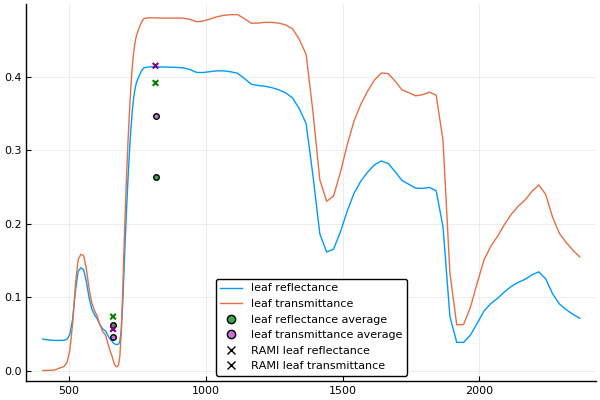

In [207]:
CanopyRT.fluspect!(leaf, CanopyRT.optis)

plot(wl,leaf.ρ_SW ,label="leaf reflectance")
plot!(wl,leaf.τ_SW,label="leaf transmittance" )
scatter!([wl[28],wl[52]],[Statistics.mean(leaf.ρ_SW[1:34]),Statistics.mean(leaf.ρ_SW[35:114])],label="leaf reflectance average")
scatter!([wl[28],wl[52]],[Statistics.mean(leaf.τ_SW[1:34]),Statistics.mean(leaf.τ_SW[35:114])],label="leaf transmittance average")
scatter!([wl[28],wl[52]],shape=:x,color=[:green],[0.0735,0.3912],label="RAMI leaf reflectance" )
scatter!([wl[28],wl[52]],shape=:x,color=[:purple],[0.0566,0.4146],label="RAMI leaf transmittance")


# Normalizing reflectance

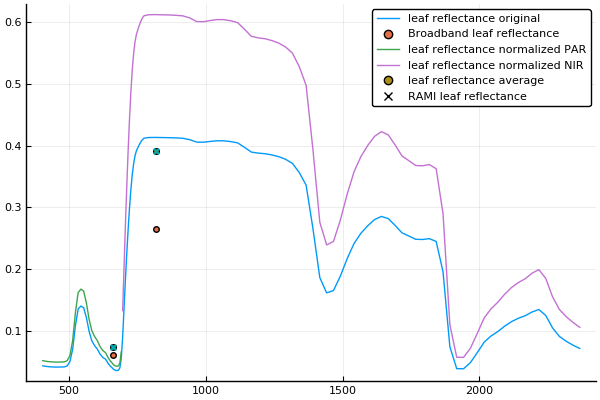

In [208]:
#Reflectance
#Original
plot(wl,leaf.ρ_SW ,label="leaf reflectance original")
scatter!([wl[28],wl[52]],[Statistics.mean(leaf.ρ_SW[1:34]),Statistics.mean(leaf.ρ_SW[35:114])],label="Broadband leaf reflectance" )

#Normalizing:

# leaf reflectance RED        
leaf.ρ_SW[1:34] = leaf.ρ_SW[1:34].*(Statistics.mean(leaf.ρ_SW[1:34])/0.0735)^-1
leaf.ρ_SW[35:114] = leaf.ρ_SW[35:114].*(Statistics.mean(leaf.ρ_SW[35:114])/0.3912)^-1



plot!(wl[1:34],leaf.ρ_SW[1:34],label="leaf reflectance normalized PAR")
plot!(wl[35:114],leaf.ρ_SW[35:114],label="leaf reflectance normalized NIR" )
scatter!([wl[28],wl[52]],[Statistics.mean(leaf.ρ_SW[1:34]),Statistics.mean(leaf.ρ_SW[35:114])],label="leaf reflectance average")
scatter!([wl[28],wl[52]],shape=:x,[0.0735,0.3912],label="RAMI leaf reflectance" )



# Normalizing transmittance

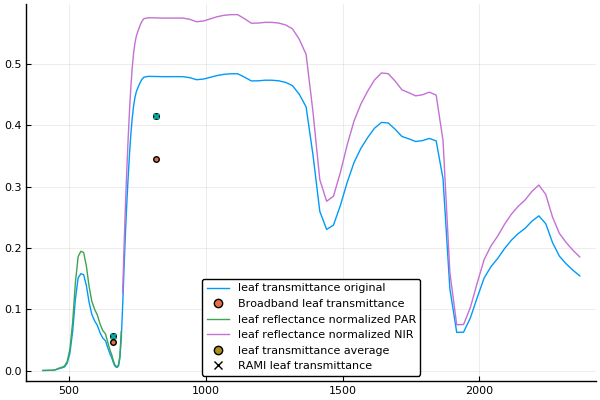

In [142]:
#Transmittance
#Original
plot(wl,leaf.τ_SW ,label="leaf transmittance original")
scatter!([wl[28],wl[52]],[Statistics.mean(leaf.τ_SW[1:34]),Statistics.mean(leaf.τ_SW[35:114])],label="Broadband leaf transmittance" )

#Normalizing:

# leaf transmittance
leaf.τ_SW[1:34] = leaf.τ_SW[1:34].*(Statistics.mean(leaf.τ_SW[1:34])/0.0566)^-1
leaf.τ_SW[35:114] = leaf.τ_SW[35:114].*(Statistics.mean(leaf.τ_SW[35:114])/0.4146)^-1


plot!(wl[1:34],leaf.τ_SW[1:34],label="leaf reflectance normalized PAR")
plot!(wl[35:114],leaf.τ_SW[35:114],label="leaf reflectance normalized NIR" )

scatter!([wl[28],wl[52]],[Statistics.mean(leaf.τ_SW[1:34]),Statistics.mean(leaf.τ_SW[35:114])],label="leaf transmittance average")
scatter!([wl[28],wl[52]],shape=:x,[0.0566,0.4146],label="RAMI leaf transmittance" )


In [152]:
function RAMI_case_multi(LAI, soil_albedo, clumping_index,SZA)

  CanopyRT.soil.albedo_SW[:] .=soil_albedo;
  #Clumping index
  CanopyRT.canopy.Ω = 1.0
  #Viewing Zenith Angle in degrees
  CanopyRT.angles.tto=0.0
  #Leaf Area index
  CanopyRT.canopy.LAI=LAI
  #Solar Zenith Angle
  CanopyRT.angles.tts=SZA 
    
  reflRed_SZA = []
  absRed_SZA = []
  transRed_SZA = []

  for wli=1:1:length(wl)
 

   CanopyRT.fluspect!(leaf, CanopyRT.optis)
   CanopyRT.computeCanopyGeomProps!(canopy, angles,canOpt)
   CanopyRT.computeCanopyMatrices!(arrayOfLeaves,canOpt);

   # leaf reflectance        
   leaf.ρ_SW[1:34] = leaf.ρ_SW[1:34].*(Statistics.mean(leaf.ρ_SW[1:34])/0.0735)^-1
   leaf.ρ_SW[35:114] = leaf.ρ_SW[35:114].*(Statistics.mean(leaf.ρ_SW[35:114])/0.3912)^-1
   # leaf transmittance
   leaf.τ_SW[1:34] = leaf.τ_SW[1:34].*(Statistics.mean(leaf.τ_SW[1:34])/0.0566)^-1
   leaf.τ_SW[35:114] = leaf.τ_SW[35:114].*(Statistics.mean(leaf.τ_SW[35:114])/0.4146)^-1
    
        
    #Setting all diffuse to zero
    sunRad.E_diffuse[wli] = 0.0
    
    CanopyRT.RTM_SW!(canopy, canOpt, canRad,sunRad, CanopyRT.soil);
    push!(reflRed_SZA, canRad.alb_direct[wli])
    push!(absRed_SZA, (sum(canRad.netSW_shade,dims=2)[wli,1].+sum(canRad.netSW_sunlit,dims=2)[wli,1])./(sunRad.E_diffuse[wli].+sunRad.E_direct[wli]))
        push!(transRed_SZA,  (canOpt.Es_[wli,end] .+ canRad.E_down[wli,end])./(sunRad.E_diffuse[wli].+sunRad.E_direct[wli]))
  end

  #### Clumped Case

  reflRed_clump_SZA = []
  absRed_clump_SZA = []
  transRed_clump_SZA = []


  #Clumping index
  CanopyRT.canopy.Ω = clumping_index

  for wli=1:1:length(wl)

    CanopyRT.fluspect!(leaf, CanopyRT.optis)
    CanopyRT.computeCanopyGeomProps!(canopy, angles,canOpt)
    CanopyRT.computeCanopyMatrices!(arrayOfLeaves,canOpt);
        
    # leaf reflectance        
   leaf.ρ_SW[1:34] = leaf.ρ_SW[1:34].*(Statistics.mean(leaf.ρ_SW[1:34])/0.0735)^-1
   leaf.ρ_SW[35:114] = leaf.ρ_SW[35:114].*(Statistics.mean(leaf.ρ_SW[35:114])/0.3912)^-1
   # leaf transmittance
   leaf.τ_SW[1:34] = leaf.τ_SW[1:34].*(Statistics.mean(leaf.τ_SW[1:34])/0.0566)^-1
   leaf.τ_SW[35:114] = leaf.τ_SW[35:114].*(Statistics.mean(leaf.τ_SW[35:114])/0.4146)^-1
        
    #Setting all diffuse to zero
    sunRad.E_diffuse[wli] = 0.0
    
    CanopyRT.RTM_SW!(canopy, canOpt, canRad,sunRad, CanopyRT.soil);
    push!(reflRed_clump_SZA, canRad.alb_direct[wli])
    push!(absRed_clump_SZA, (sum(canRad.netSW_shade,dims=2)[wli,1].+sum(canRad.netSW_sunlit,dims=2)[wli,1])./(sunRad.E_diffuse[wli].+sunRad.E_direct[wli]))
        push!(transRed_clump_SZA,  (canOpt.Es_[wli,end] .+ canRad.E_down[wli,end])./(sunRad.E_diffuse[wli].+sunRad.E_direct[wli]))

  end
    
  return reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA
    
end;


In [211]:
#Sparse case with black soil and SZA = 27.
reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(0.50265, 0.0, 0.365864235,27.0);


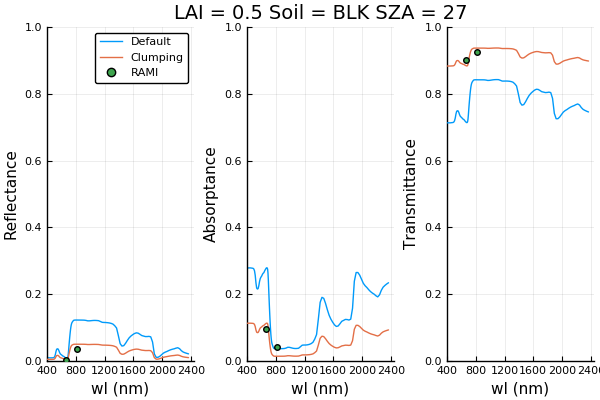

In [217]:
#050_BLK_SZA_27
plot(wl,[reflRed_SZA,absRed_SZA,transRed_SZA] ,label=["Default" "" ""], layout = (1, 3), ylabel=["Reflectance" "Absorptance" "Transmittance"],title=["" "LAI = 0.5 Soil = BLK SZA = 27" ""])
plot!(wl,[reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA] ,label=["Clumping" "" ""] )
scatter!([wl[28],wl[52]],[[RAMI_frefRed_050_BLK[1],RAMI_frefNIR_050_BLK[1]],[RAMI_fabsRed_050_BLK[1],RAMI_fabsNIR_050_BLK[1]],[RAMI_ftranRed_050_BLK[1],RAMI_ftranNIR_050_BLK[1]]],label=["RAMI" "" ""] )

plot!(xlims = (400.0, 2440.), ylims = (-0.0, 1.), xticks = 400:400:2400., yticks = 0:0.2:1.0)
#ylabel!(["Reflectance" "Absorptance" "Transmittance"])
xlabel!("wl (nm)")
#title!("050_BLK")


In [155]:
#Sparse case with black soil and SZA = 60.
reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(0.50265, 0.0, 0.365864235,60.0);


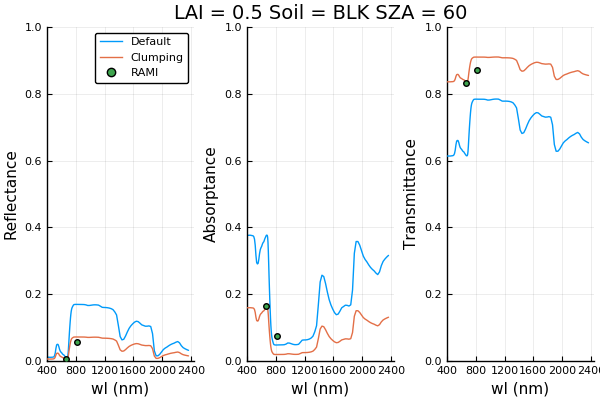

In [156]:
#050_BLK_SZA_60
plot(wl,[reflRed_SZA,absRed_SZA,transRed_SZA] ,label=["Default" "" ""], layout = (1, 3), ylabel=["Reflectance" "Absorptance" "Transmittance"],title=["" "LAI = 0.5 Soil = BLK SZA = 60" ""])
plot!(wl,[reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA] ,label=["Clumping" "" ""] )
scatter!([wl[28],wl[52]],[[RAMI_frefRed_050_BLK[2],RAMI_frefNIR_050_BLK[2]],[RAMI_fabsRed_050_BLK[2],RAMI_fabsNIR_050_BLK[2]],[RAMI_ftranRed_050_BLK[2],RAMI_ftranNIR_050_BLK[2]]],label=["RAMI" "" ""] )

plot!(xlims = (400.0, 2440.), ylims = (-0.0, 1.), xticks = 400:400:2400., yticks = 0:0.2:1.0)
#ylabel!(["Reflectance" "Absorptance" "Transmittance"])
xlabel!("wl (nm)")
#title!("050_BLK")


In [157]:
#Sparse case with black soil and SZA = 83.
reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(0.50265, 0.0, 0.365864235,83.0);


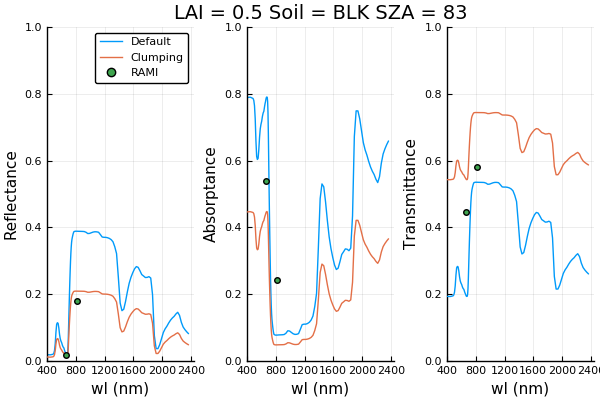

In [158]:
#050_BLK_SZA_83
plot(wl,[reflRed_SZA,absRed_SZA,transRed_SZA] ,label=["Default" "" ""], layout = (1, 3), ylabel=["Reflectance" "Absorptance" "Transmittance"],title=["" "LAI = 0.5 Soil = BLK SZA = 83" ""])
plot!(wl,[reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA] ,label=["Clumping" "" ""] )
scatter!([wl[28],wl[52]],[[RAMI_frefRed_050_BLK[3],RAMI_frefNIR_050_BLK[3]],[RAMI_fabsRed_050_BLK[3],RAMI_fabsNIR_050_BLK[3]],[RAMI_ftranRed_050_BLK[3],RAMI_ftranNIR_050_BLK[3]]],label=["RAMI" "" ""] )

plot!(xlims = (400.0, 2440.), ylims = (-0.0, 1.), xticks = 400:400:2400., yticks = 0:0.2:1.0)
#ylabel!(["Reflectance" "Absorptance" "Transmittance"])
xlabel!("wl (nm)")
#title!("050_BLK")


In [159]:
#Medium case with black soil and SZA = 0.
reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(1.5017, 0.0, 0.405417644,27.0);


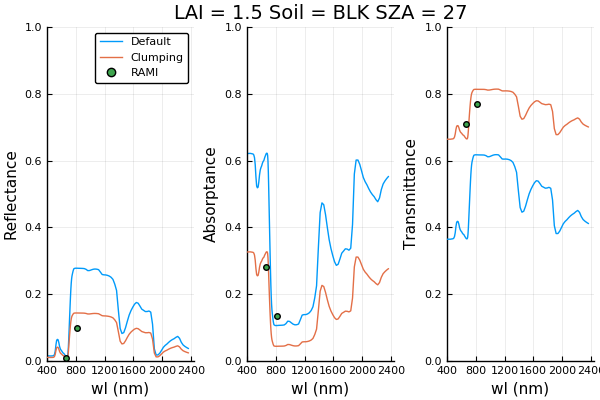

In [160]:
#150_BLK_SZA_27
plot(wl,[reflRed_SZA,absRed_SZA,transRed_SZA] ,label=["Default" "" ""], layout = (1, 3), ylabel=["Reflectance" "Absorptance" "Transmittance"],title=["" "LAI = 1.5 Soil = BLK SZA = 27" ""])
plot!(wl,[reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA] ,label=["Clumping" "" ""] )
scatter!([wl[28],wl[52]],[[RAMI_frefRed_150_BLK[1],RAMI_frefNIR_150_BLK[1]],[RAMI_fabsRed_150_BLK[1],RAMI_fabsNIR_150_BLK[1]],[RAMI_ftranRed_150_BLK[1],RAMI_ftranNIR_150_BLK[1]]],label=["RAMI" "" ""] )

plot!(xlims = (400.0, 2440.), ylims = (-0.0, 1.), xticks = 400:400:2400., yticks = 0:0.2:1.0)
#ylabel!(["Reflectance" "Absorptance" "Transmittance"])
xlabel!("wl (nm)")
#title!("050_BLK")


In [161]:
#Medium case with black soil and SZA = 60.
reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(1.5017, 0.0, 0.405417644,60.0);


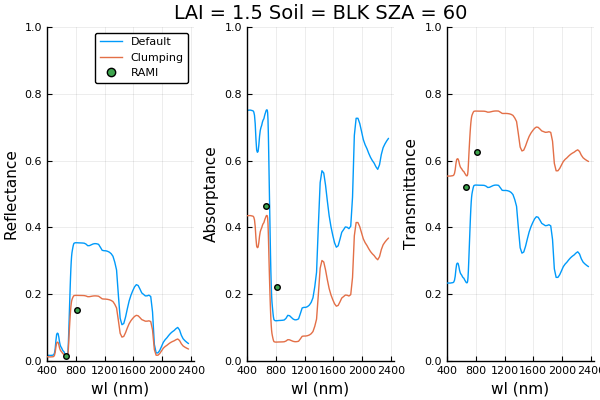

In [162]:
#150_BLK_SZA_60
plot(wl,[reflRed_SZA,absRed_SZA,transRed_SZA] ,label=["Default" "" ""], layout = (1, 3), ylabel=["Reflectance" "Absorptance" "Transmittance"],title=["" "LAI = 1.5 Soil = BLK SZA = 60" ""])
plot!(wl,[reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA] ,label=["Clumping" "" ""] )
scatter!([wl[28],wl[52]],[[RAMI_frefRed_150_BLK[2],RAMI_frefNIR_150_BLK[2]],[RAMI_fabsRed_150_BLK[2],RAMI_fabsNIR_150_BLK[2]],[RAMI_ftranRed_150_BLK[2],RAMI_ftranNIR_150_BLK[2]]],label=["RAMI" "" ""] )

plot!(xlims = (400.0, 2440.), ylims = (-0.0, 1.), xticks = 400:400:2400., yticks = 0:0.2:1.0)
#ylabel!(["Reflectance" "Absorptance" "Transmittance"])
xlabel!("wl (nm)")
#title!("050_BLK")


In [163]:
#Medium case with black soil and SZA = 83.
reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(1.5017, 0.0, 0.405417644,83.0);


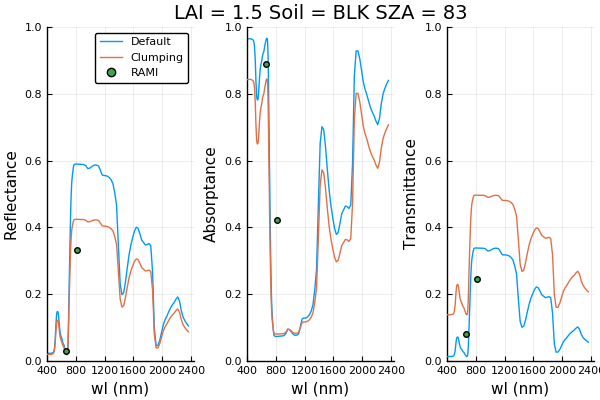

In [164]:
#150_BLK_SZA_83
plot(wl,[reflRed_SZA,absRed_SZA,transRed_SZA] ,label=["Default" "" ""], layout = (1, 3), ylabel=["Reflectance" "Absorptance" "Transmittance"],title=["" "LAI = 1.5 Soil = BLK SZA = 83" ""])
plot!(wl,[reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA] ,label=["Clumping" "" ""] )
scatter!([wl[28],wl[52]],[[RAMI_frefRed_150_BLK[3],RAMI_frefNIR_150_BLK[3]],[RAMI_fabsRed_150_BLK[3],RAMI_fabsNIR_150_BLK[3]],[RAMI_ftranRed_150_BLK[3],RAMI_ftranNIR_150_BLK[3]]],label=["RAMI" "" ""] )

plot!(xlims = (400.0, 2440.), ylims = (-0.0, 1.), xticks = 400:400:2400., yticks = 0:0.2:1.0)
#ylabel!(["Reflectance" "Absorptance" "Transmittance"])
xlabel!("wl (nm)")
#title!("050_BLK")


In [165]:
#Dense case with black soil SZA =27
reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(2.5007, 0.0, 0.45946608,27.);


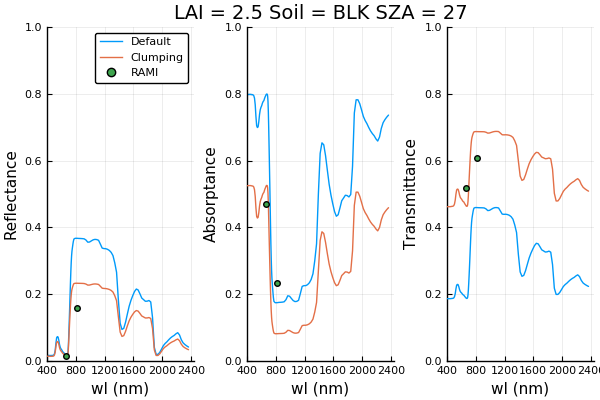

In [166]:
#150_BLK_SZA_83
plot(wl,[reflRed_SZA,absRed_SZA,transRed_SZA] ,label=["Default" "" ""], layout = (1, 3), ylabel=["Reflectance" "Absorptance" "Transmittance"],title=["" "LAI = 2.5 Soil = BLK SZA = 27" ""])
plot!(wl,[reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA] ,label=["Clumping" "" ""] )
scatter!([wl[28],wl[52]],[[RAMI_frefRed_250_BLK[1],RAMI_frefNIR_250_BLK[1]],[RAMI_fabsRed_250_BLK[1],RAMI_fabsNIR_250_BLK[1]],[RAMI_ftranRed_250_BLK[1],RAMI_ftranNIR_250_BLK[1]]],label=["RAMI" "" ""] )

plot!(xlims = (400.0, 2440.), ylims = (-0.0, 1.), xticks = 400:400:2400., yticks = 0:0.2:1.0)
#ylabel!(["Reflectance" "Absorptance" "Transmittance"])
xlabel!("wl (nm)")
#title!("050_BLK")

In [167]:
#Dense case with black soil SZA =27
reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(2.5007, 0.0, 0.45946608,60.);


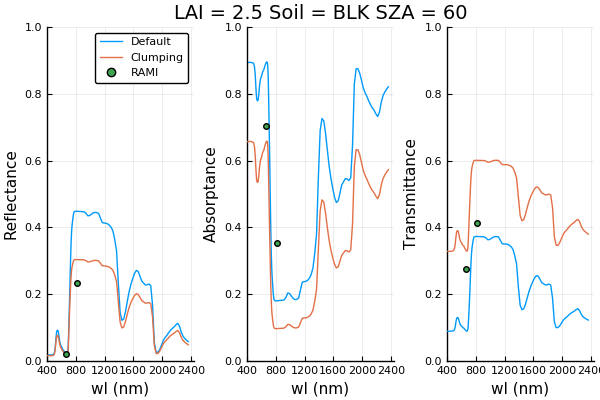

In [168]:
#250_BLK_SZA_60
plot(wl,[reflRed_SZA,absRed_SZA,transRed_SZA] ,label=["Default" "" ""], layout = (1, 3), ylabel=["Reflectance" "Absorptance" "Transmittance"],title=["" "LAI = 2.5 Soil = BLK SZA = 60" ""])
plot!(wl,[reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA] ,label=["Clumping" "" ""] )
scatter!([wl[28],wl[52]],[[RAMI_frefRed_250_BLK[2],RAMI_frefNIR_250_BLK[2]],[RAMI_fabsRed_250_BLK[2],RAMI_fabsNIR_250_BLK[2]],[RAMI_ftranRed_250_BLK[2],RAMI_ftranNIR_250_BLK[2]]],label=["RAMI" "" ""] )

plot!(xlims = (400.0, 2440.), ylims = (-0.0, 1.), xticks = 400:400:2400., yticks = 0:0.2:1.0)
#ylabel!(["Reflectance" "Absorptance" "Transmittance"])
xlabel!("wl (nm)")
#title!("050_BLK")

In [169]:
#Dense case with black soil SZA =83
reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(2.5007, 0.0, 0.45946608,83.);


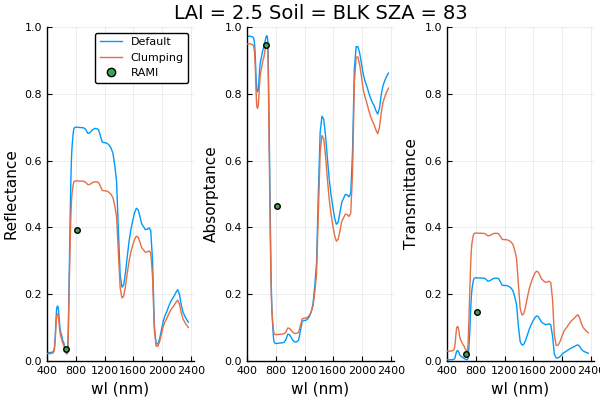

In [170]:
#250_BLK_SZA_60
plot(wl,[reflRed_SZA,absRed_SZA,transRed_SZA] ,label=["Default" "" ""], layout = (1, 3), ylabel=["Reflectance" "Absorptance" "Transmittance"],title=["" "LAI = 2.5 Soil = BLK SZA = 83" ""])
plot!(wl,[reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA] ,label=["Clumping" "" ""] )
scatter!([wl[28],wl[52]],[[RAMI_frefRed_250_BLK[3],RAMI_frefNIR_250_BLK[3]],[RAMI_fabsRed_250_BLK[3],RAMI_fabsNIR_250_BLK[3]],[RAMI_ftranRed_250_BLK[3],RAMI_ftranNIR_250_BLK[3]]],label=["RAMI" "" ""] )

plot!(xlims = (400.0, 2440.), ylims = (-0.0, 1.), xticks = 400:400:2400., yticks = 0:0.2:1.0)
#ylabel!(["Reflectance" "Absorptance" "Transmittance"])
xlabel!("wl (nm)")
#title!("050_BLK")

In [225]:
reflRed_SZA_tot = []
absRed_SZA_tot = []
transRed_SZA_tot = []

transRed_clump_SZA_tot = []

for SZA in [27,60,83]
    
    #Dense case with black soil SZA =83
    reflRed_SZA,absRed_SZA,transRed_SZA,reflRed_clump_SZA,absRed_clump_SZA,transRed_clump_SZA=RAMI_case_multi(2.5, 0.0, 0.45946608,SZA);
  
    push!(transRed_SZA_tot,transRed_SZA)
    push!(transRed_clump_SZA_tot,transRed_clump_SZA)
end



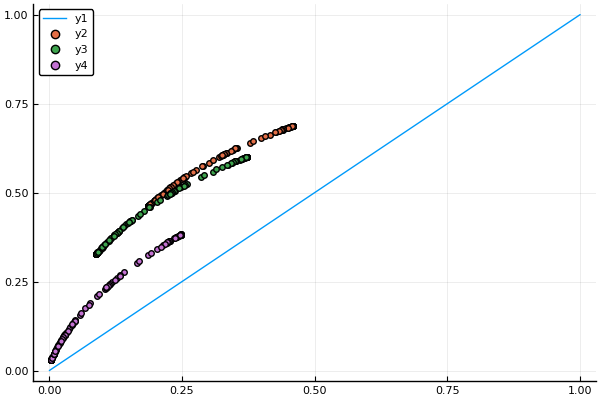

In [230]:
plot([0,1],[0,1])
scatter!(transRed_SZA_tot,transRed_clump_SZA_tot)

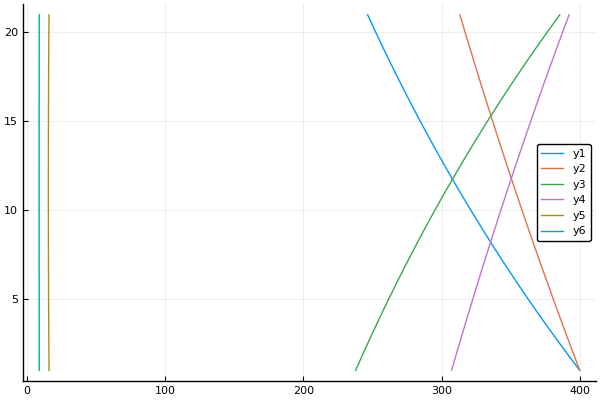

In [216]:
layer=1:1:21

#Clumping index
CanopyRT.canopy.Ω = 1.0
# Compute Long Wave (Last term is LW incoming in W m^-2)
F⁻,F⁺,net_diffuse=CanopyRT.computeThermalFluxes!(arrayOfLeaves, canOpt, canRad, canopy, soil, [Float32(400.0)])

#Clumping index
CanopyRT.canopy.Ω = 0.5
# Compute Long Wave (Last term is LW incoming in W m^-2)
F_clump⁻,F_clump⁺,net_diffuse_clump=CanopyRT.computeThermalFluxes!(arrayOfLeaves, canOpt, canRad, canopy, soil, [Float32(400.0)])

plot(F⁻[:],layer)
plot!(F_clump⁻[:],layer)
plot!(F⁺[:],layer)
plot!(F_clump⁺[:],layer)
plot!(net_diffuse[:],layer)
plot!(net_diffuse_clump[:],layer)


